In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

import glob
import os

In [2]:
work_dir = 'C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC'

In [3]:
df = pd.read_csv(f'{work_dir}/Redshifts/Redshifts.csv', index_col = 0)

In [4]:
z = df.query('Names == "UGC11751"').Redshift.iloc[0]
block_reduce = df.query('Names == "UGC11751"').block_reduce.iloc[0]

In [5]:
coords_df = pd.read_csv(f'{work_dir}/data/all_coords.csv', index_col = 0)

Going to investigate issue with Arp 240.

In [6]:
df[5:10]

,block_reduce,Names,Redshift,neg,t
5,8,UGC11751,0.02909,y,n
6,32,Arp104,0.01082,y,n
7,2,Heart,0.04000,rereduce,rereduce
8,22,Arp285,0.00967,rereduce,rereduce
9,90,Arp214,0.00331,y,n


In [7]:
coords_df[:5]

,Prim_RA,Prim_DEC,Sec_RA,Sec_DEC,Names
0,204.970333,0.839844,204.990208,0.830667,Arp240
1,30.957167,14.738644,30.937292,14.709056,Arp290
2,144.433333,2.760164,144.437875,2.746886,Arp142
3,32.352333,-10.136006,32.337292,-10.133158,Arp318
4,4.708583,-10.361625,4.711833,-10.376950,Arp256


In [8]:
row = coords_df.query('Names == "UGC11751"')
prim_ra = row.Prim_RA.iloc[0]
prim_dec = row.Prim_DEC.iloc[0]
sec_ra = row.Sec_RA.iloc[0]
sec_dec = row.Sec_DEC.iloc[0]

In [9]:
data = np.load(f'{work_dir}/All_Inputs/UGC11751.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


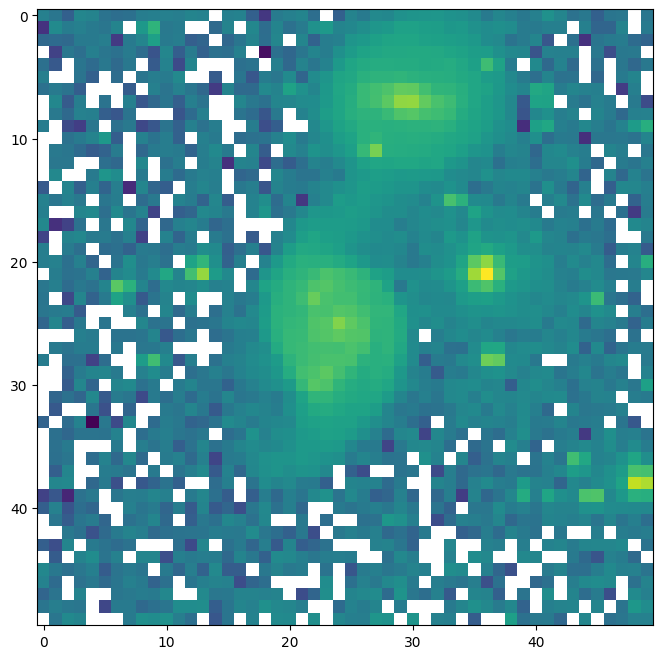

In [10]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(data))
plt.show()

In [11]:
prim_coords = SkyCoord(ra = prim_ra * u.deg, dec = prim_dec * u.deg, frame = 'fk5')
sec_coords = SkyCoord(ra = sec_ra * u.deg, dec = sec_dec * u.deg, frame = 'fk5')

In [12]:
ddra, ddec = prim_coords.spherical_offsets_to(sec_coords)
ddra_as = ddra.to(u.arcsec)
ddec_as = ddec.to(u.arcsec)

In [13]:
cosmo = FlatLambdaCDM(H0=67.8 * u.km / u.s / u.Mpc, Tcmb0=2.275 * u.K, Om0 = 0.308)

conversion = cosmo.kpc_proper_per_arcmin(z)

In [14]:
phys_x = conversion * ddra_as
phys_y = conversion * ddec_as

sim_x = float(phys_x / (15 * u.kpc))
sim_y = float(phys_y / (15 * u.kpc))

In [15]:
pix_res = (block_reduce * 0.396 * u.arcsec)  * conversion.to(u.kpc / u.arcsec) / (15 * u.kpc)

In [16]:
pix_res

<Quantity 0.12711726>

In [17]:
sim_x 

-0.6400578368763322

In [18]:
if sim_x > 0:
    pixel_x = int(np.round(sim_x / pix_res) + 25)
elif sim_x < 0:
    pixel_x = -int(np.round(sim_x / pix_res) - 25)
else:
    pixel_x = int(sim_x + 25)

In [19]:
if sim_y > 0:
    pixel_y = int(np.round(sim_y / pix_res) + 25)  + 1
elif sim_y < 0:
    pixel_y = -int(np.round(sim_y / pix_res) - 25)  + 1
else:
    pixel_y = int(sim_y + 25)  + 1

In [20]:
sim_x

-0.6400578368763322

In [21]:
sim_y

-2.234150207028618

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


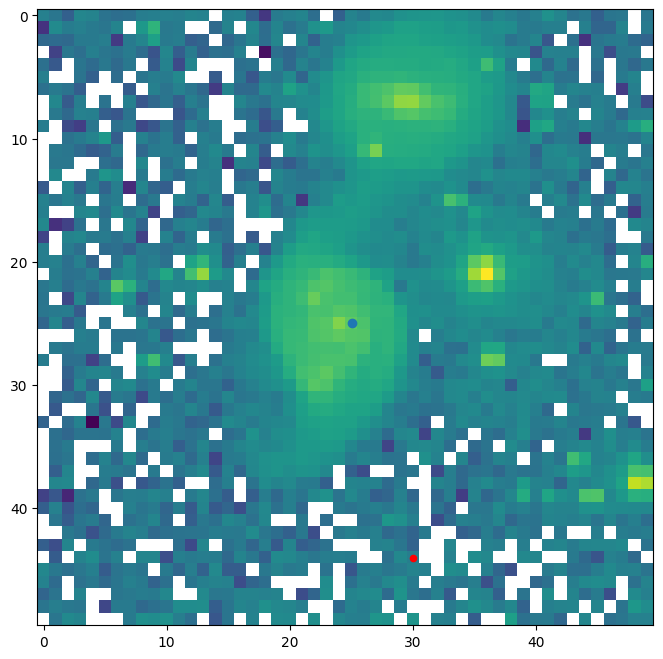

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(data))
plt.scatter(25,25)
plt.scatter(pixel_x, pixel_y, s = 20, color='r')
plt.show()